In [1]:
# importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
# Loading the dataset
data = pd.read_csv("Superstore.csv",encoding='latin-1')

In [24]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [23]:
# shape of the dataset
data.shape

(9994, 21)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [36]:
#Transforming order-date & ship-date to datetime. After this creating new columns which present their month's & years respectively.
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])
data["order_month"] = pd.to_datetime(data["Order Date"]).dt.month_name()
data["order_year"] = pd.to_datetime(data["Order Date"]).dt.year
data["Ship_month"] = pd.to_datetime(data["Ship Date"]).dt.month_name()
data["Ship_year"] = pd.to_datetime(data["Ship Date"]).dt.year

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [34]:
data.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_month,order_year,Ship_month,Ship_year
9771,9772,CA-2016-123533,2016-11-24,2016-11-30,Standard Class,SC-20050,Sample Company A,Home Office,United States,Hialeah,...,Appliances,Fellowes Advanced Computer Series Surge Protec...,42.384,2,0.2,4.2384,November,2016,November,2016


In [38]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,2016-05-03 23:06:58.571142912,2014-01-07 00:00:00,2015-05-27 00:00:00,2016-06-29 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108
order_year,9994.0,2015.722233,2014.0,2015.0,2016.0,2017.0,2017.0,1.123555
Ship_year,9994.0,2015.737442,2014.0,2015.0,2016.0,2017.0,2018.0,1.126141


In [35]:
#Missing Value Treatment
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order_month      0
order_year       0
Ship_month       0
Ship_year        0
dtype: int64

Exploratoty Data Analysis

# Sales Analysis
# Calculating Monthly Sales.


In [42]:
monthly_sales = data.groupby("order_month")["Sales"].sum().reset_index().sort_values(by='Sales')
monthly_sales

,order_month,Sales
3,February,59751.2514
4,January,94924.8356
0,April,137762.1286
5,July,147238.0970
6,June,152718.6793
8,May,155028.8117
1,August,159044.0630
10,October,200322.9847
7,March,205005.4888
11,September,307649.9457


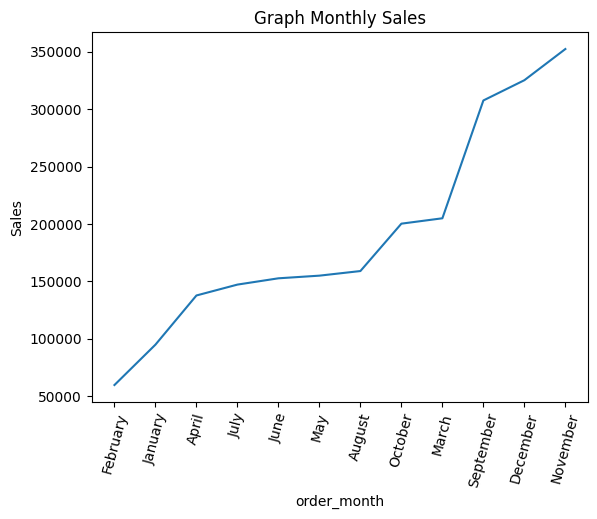

In [44]:
plt.title("Graph Monthly Sales")
sns.lineplot(monthly_sales,x = "order_month",y="Sales")
plt.xticks(rotation = 75)
plt.show;

In [45]:
# Sales on the basis of Category
category_sales = data.groupby('Category')["Sales"].sum()
category_sales

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

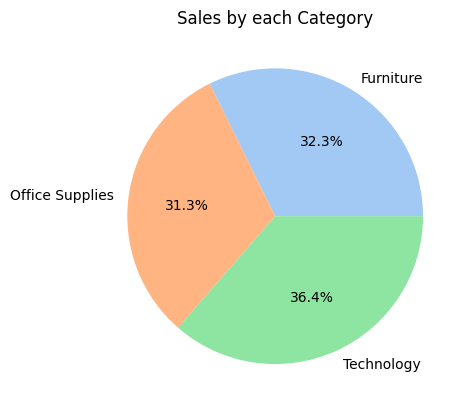

In [47]:
plt.title("Sales by each Category")
colors = sns.color_palette('pastel')[0:len(category_sales)]
plt.pie(category_sales,labels=category_sales.index, autopct='%1.1f%%',colors=colors);

In [48]:
#sales per Sub-Category
Sub_category_sales = data.groupby('Sub-Category')["Sales"].sum().reset_index()
Sub_category_sales

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


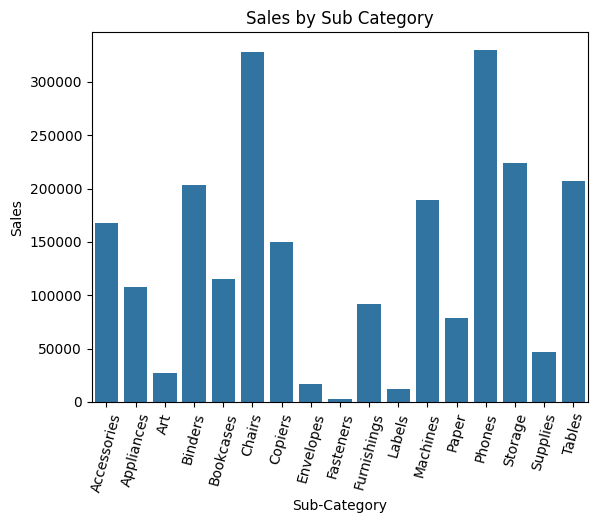

In [53]:
plt.title("Sales by Sub Category")
sns.barplot(Sub_category_sales,x = 'Sub-Category',y='Sales')
plt.xticks(rotation = 75);

In [54]:
# Profit's earned each month.
monthly_profit = data.groupby("order_month")["Profit"].sum().reset_index()
monthly_profit

,order_month,Profit
0,April,11587.4363
1,August,21776.9384
2,December,43369.1919
3,February,10294.6107
4,January,9134.4461
5,July,13832.6648
6,June,21285.7954
7,March,28594.6872
8,May,22411.3078
9,November,35468.4265


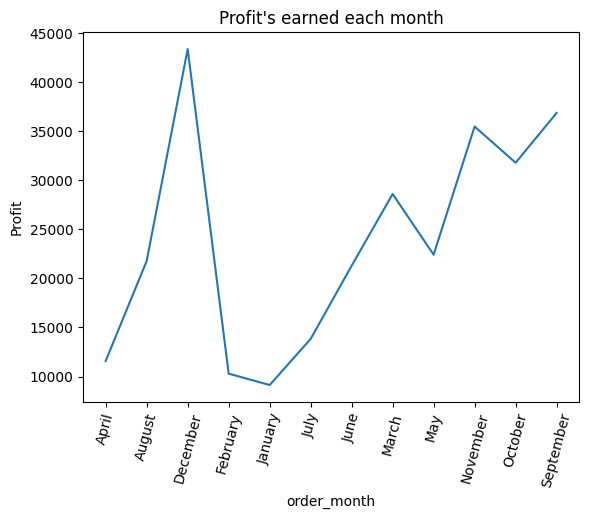

In [55]:
plt.title("Profit's earned each month")
sns.lineplot(monthly_profit,x="order_month",y = "Profit")
plt.xticks(rotation = 75);

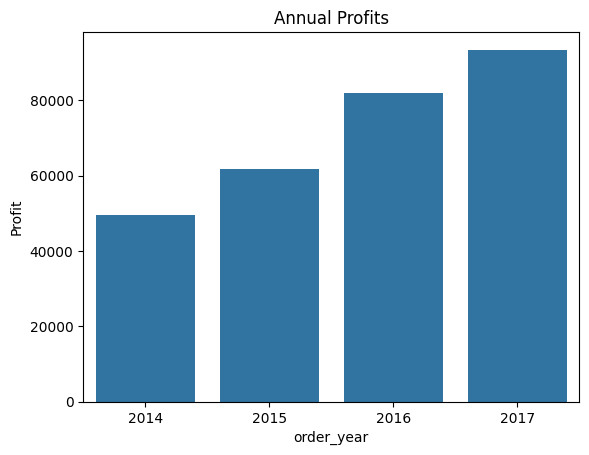

In [56]:
# profit's earned per annum.
annual_profit = data.groupby("order_year")["Profit"].sum().reset_index()
plt.title("Annual Profits")
sns.barplot(annual_profit,x = "order_year",y = "Profit");

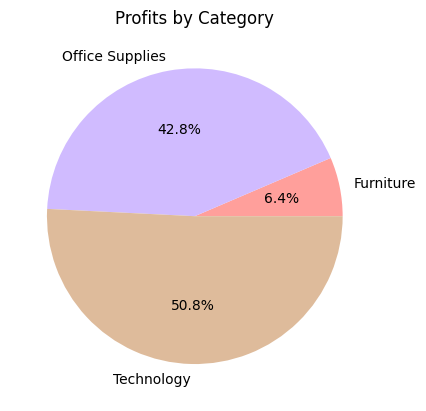

In [58]:
#Profit's earned by each category.
category_profits = data.groupby("Category")["Profit"].sum()
plt.title("Profits by Category")
colors = sns.color_palette('pastel')[3:7]
plt.pie(category_profits,labels=category_profits.index,autopct='%1.1f%%',colors=colors);

In [59]:
# Profit's earned by each sub category
sub_profit = data.groupby("Sub-Category")["Profit"].sum().reset_index()
sub_profit

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


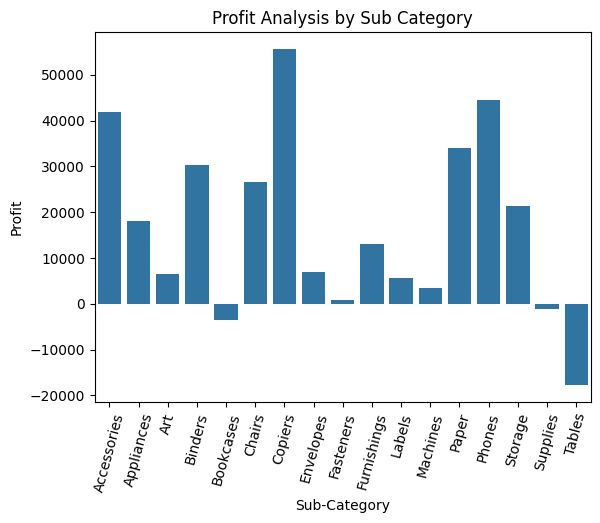

In [60]:
plt.title("Profit Analysis by Sub Category")
sns.barplot(sub_profit,x = "Sub-Category",y = "Profit")
plt.xticks(rotation = 75);

Sales-Profit Comparison w.r.t Segment

In [61]:
segment = data.groupby("Segment")[["Sales","Profit"]].sum()
segment

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


<Figure size 1200x600 with 0 Axes>

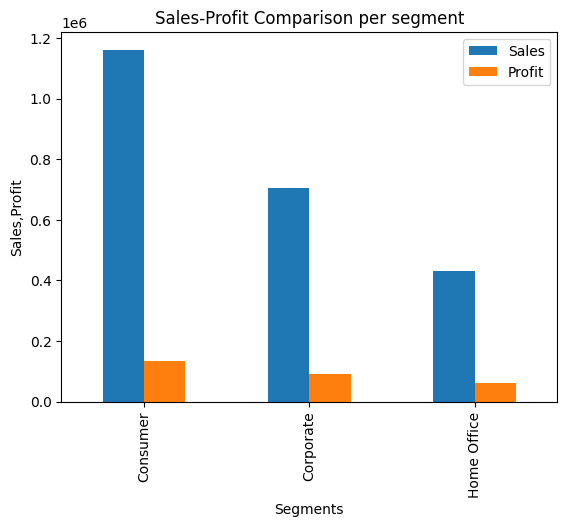

In [62]:
plt.figure(figsize=(12, 6))
segment.plot(kind='bar')
plt.title("Sales-Profit Comparison per segment")
plt.xlabel("Segments")
plt.ylabel("Sales,Profit");

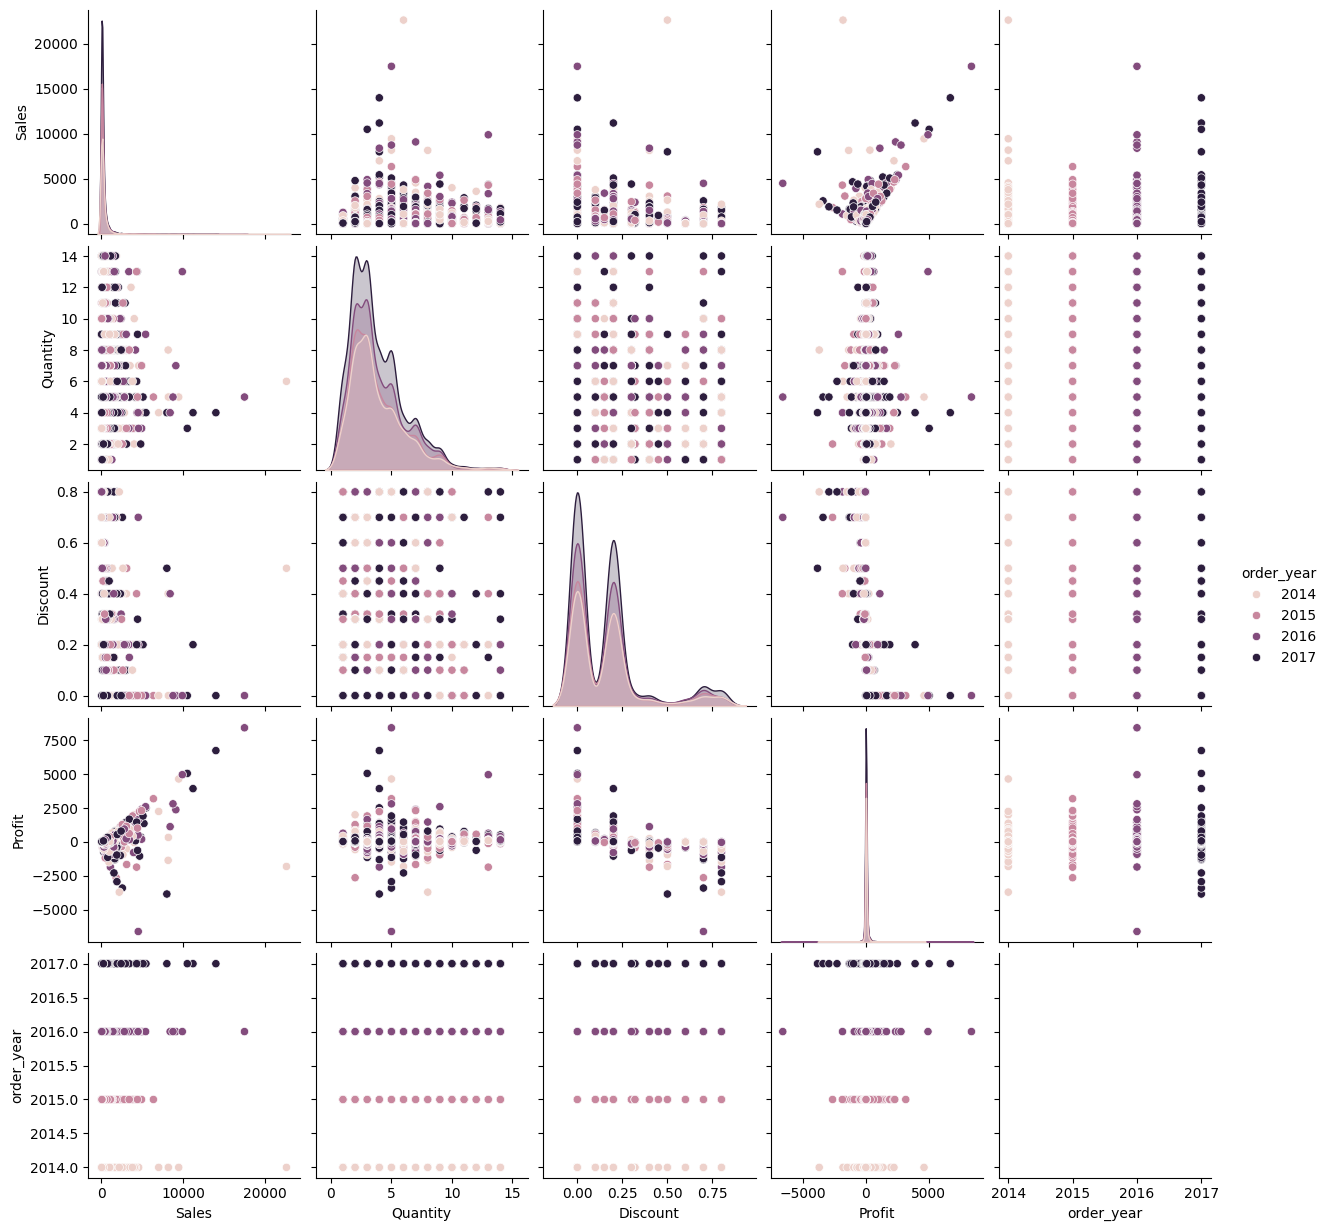

In [63]:
# Plotting a PairPlot
sns.pairplot(data,vars=['Sales', 'Quantity', 'Discount', 'Profit','order_year'], hue='order_year')

In [64]:
# Clubbing all Numerical Columns
Num1 = data[['Row ID',  'Postal Code','Sales', 'Quantity', 'Discount', 'Profit', 'Ship_year']]
# Clubbing all Categorical Columns
Cat1 = data[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Region', 'Product ID', 'Category', 'Sub-Category', 'order_month',  'Ship_month',
        'Product Name', 
        'order_month']]
columns = data[['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Row ID    9994 non-null   int64  
 1   Sales     9994 non-null   float64
 2   Quantity  9994 non-null   int64  
 3   Discount  9994 non-null   float64
 4   Profit    9994 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 390.5 KB


<Axes: >

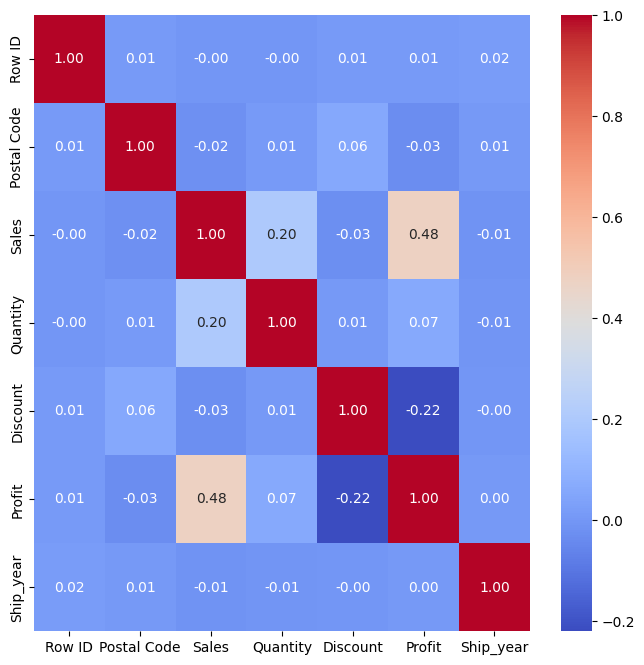

In [65]:
# Create a correlation matrix
corr_matrix = Num1.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

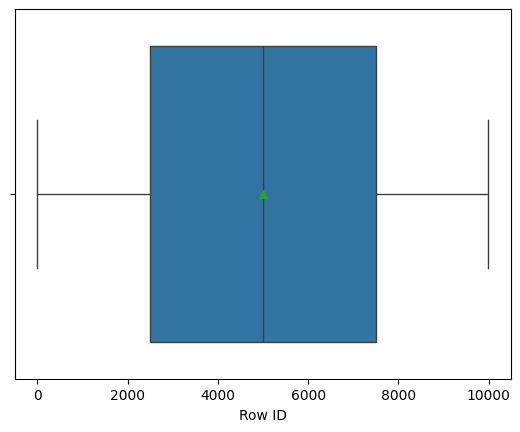

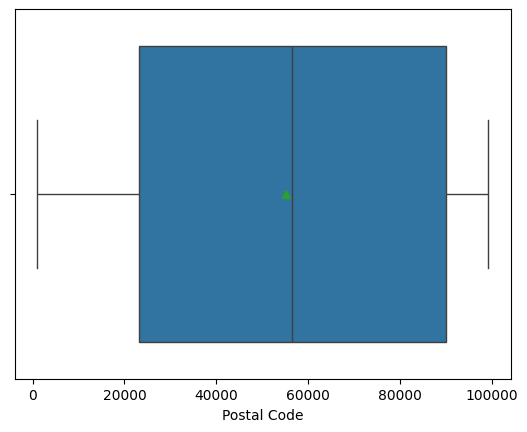

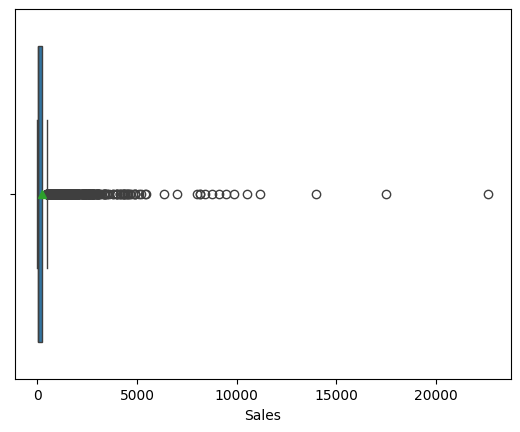

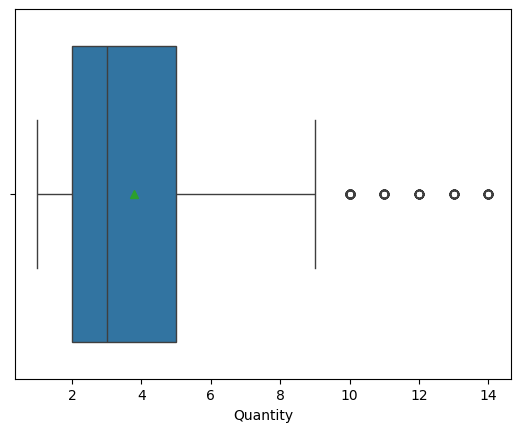

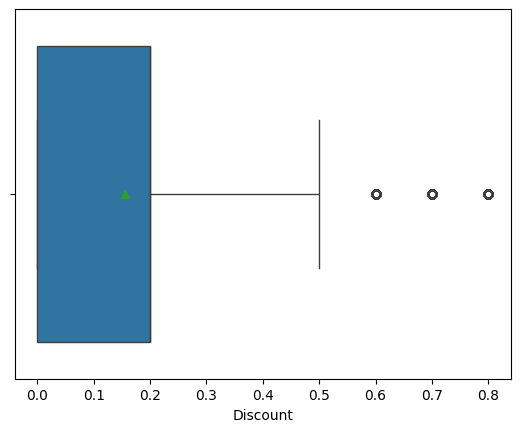

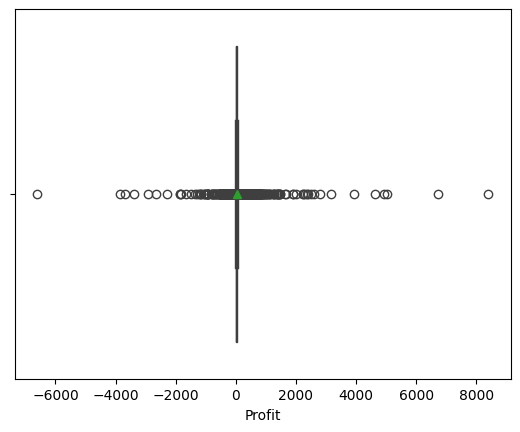

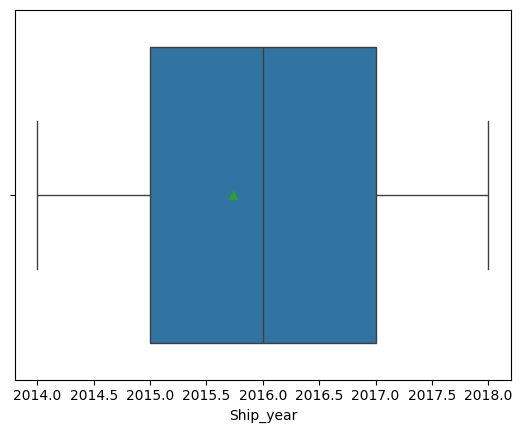

In [66]:
# Using Box-Plot to find outliers if any in the Numerical Columns
for col in Num1.columns:
    sns.boxplot(x = Num1[col],showmeans = True)    
    plt.show()

In [69]:
# Using exponential method to reduce outliers
exp = data[[ 'Sales', 'Quantity', 'Discount', 'Profit']]
np.exp(exp["Sales"])

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       5.858447e+113
1                 inf
2        2.235555e+06
3                 inf
4        5.179633e+09
            ...      
9989     9.227139e+10
9990     8.664042e+39
9991    1.986689e+112
9992     7.163358e+12
9993    4.009094e+105
Name: Sales, Length: 9994, dtype: float64

In [70]:
# Using for-loop for reducing treatment
for i in exp.columns:
    exp[i] = np.exp(exp[i])
exp

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13028\3362492993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp[i] = np.exp(exp[i])


,Sales,Quantity,Discount,Profit
0,5.858447e+113,7.389056,1.000000,1.595310e+18
1,inf,20.085537,1.000000,2.308080e+95
2,2.235555e+06,7.389056,1.000000,9.642976e+02
3,inf,148.413159,1.568312,4.484875e-167
4,5.179633e+09,7.389056,1.221403,1.238393e+01
...,...,...,...,...
9989,9.227139e+10,20.085537,1.221403,6.050948e+01
9990,8.664042e+39,7.389056,1.000000,6.157614e+06
9991,1.986689e+112,7.389056,1.221403,2.644598e+08
9992,7.163358e+12,54.598150,1.000000,6.092598e+05


In [71]:
# Replacing the values of Num1 dataframe with exponential values.
Num1[[ 'Sales', 'Quantity', 'Discount', 'Profit']] = exp[[ 'Sales', 'Quantity', 'Discount', 'Profit']]
Num1

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13028\1217559368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Num1[[ 'Sales', 'Quantity', 'Discount', 'Profit']] = exp[[ 'Sales', 'Quantity', 'Discount', 'Profit']]


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Ship_year
0,1,42420,5.858447e+113,7.389056,1.000000,1.595310e+18,2016
1,2,42420,inf,20.085537,1.000000,2.308080e+95,2016
2,3,90036,2.235555e+06,7.389056,1.000000,9.642976e+02,2016
3,4,33311,inf,148.413159,1.568312,4.484875e-167,2015
4,5,33311,5.179633e+09,7.389056,1.221403,1.238393e+01,2015
...,...,...,...,...,...,...,...
9989,9990,33180,9.227139e+10,20.085537,1.221403,6.050948e+01,2014
9990,9991,92627,8.664042e+39,7.389056,1.000000,6.157614e+06,2017
9991,9992,92627,1.986689e+112,7.389056,1.221403,2.644598e+08,2017
9992,9993,92627,7.163358e+12,54.598150,1.000000,6.092598e+05,2017


Creating New Dataframe Mod1 to build a linear_model

In [72]:
Mod1 = Num1
Cat1.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'order_month', 'Ship_month',
       'Product Name', 'order_month'],
      dtype='object')

In [78]:
Mod1.loc[:,"Region"] = Cat1["Region"]
mod1 = data[[ 'Ship Mode','Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', ]]
Mod1.loc[:,['Sales', 'Quantity', 'Discount', 'Profit',"Ship_year"]] = Num1[['Sales', 'Quantity', 'Discount', 'Profit',"Ship_year"]]
Mod1.loc[:,['Ship Mode', 
        'Segment', 'Country', 'City', 'State', 'Region',
        'Category', 'Sub-Category']] = Cat1[['Ship Mode', 
        'Segment', 'Country', 'City', 'State', 'Region',
        'Category', 'Sub-Category']] 
Mod1.sample(n = 5)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Ship_year,Region,Ship Mode,Segment,Country,City,State,Category,Sub-Category
3807,3808,33317,1.882931e+02,7.389056,2.013753,1.802853e-02,2015,South,Standard Class,Corporate,United States,Plantation,Florida,Office Supplies,Binders
8939,8940,90008,2.355131e+40,7.389056,1.221403,4.222358e+13,2015,West,Second Class,Consumer,United States,Los Angeles,California,Office Supplies,Binders
8565,8566,75056,1.493366e+29,20.085537,1.221403,8.268307e+02,2016,Central,First Class,Consumer,United States,The Colony,Texas,Technology,Phones
2578,2579,22304,1.915929e+27,20.085537,1.000000,2.335425e+13,2014,South,Standard Class,Home Office,United States,Alexandria,Virginia,Furniture,Furnishings
6423,6424,94601,1.940094e+197,2980.957987,1.221403,8.724264e-33,2015,West,First Class,Home Office,United States,Oakland,California,Furniture,Chairs


In [79]:
# All the Features to be used in the model.
Mod1.columns


Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Ship_year', 'Region', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Category', 'Sub-Category'],
      dtype='object')

In [81]:
# Using Label Encoder to encode Columns
labelencoder = LabelEncoder()

In [85]:
for i in Mod1.columns:
    Mod1.loc[:, i] = labelencoder.fit_transform(Mod1[i])


In [83]:
# Preparing X & y for model execution
# y contains Target Vatiable
y = Mod1["Profit"]
# X contains Independent Variables
X = Mod1.drop(columns='Profit')

In [84]:
X

,Row ID,Postal Code,Sales,Quantity,Discount,Ship_year,Region,Ship Mode,Segment,Country,City,State,Category,Sub-Category
0,0,217,4205,1,0,2,2,2,0,0,194,15,0,4
1,1,217,5193,2,0,2,2,2,0,0,194,15,0,5
2,2,517,969,1,0,2,3,2,1,0,266,3,1,10
3,3,170,5193,4,7,1,2,3,0,0,153,8,0,16
4,4,170,1360,1,3,1,2,3,0,0,153,8,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9989,169,1482,2,3,0,2,2,0,0,295,8,0,9
9990,9990,555,3029,1,0,3,3,3,0,0,104,3,0,9
9991,9991,555,4193,1,3,3,3,3,0,0,104,3,2,13
9992,9992,555,1644,3,0,3,3,3,0,0,104,3,1,12


In [86]:
# Dropping Country Column since the Data is of only united States
X.drop(columns='Country',inplace=True)
# Using Train-Test Split to split the data in training & testing halves.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2)

Implementing Different Machine Learning Algorithms to Predict the Profit in the most Accurate and Precise manner

In [87]:
# 1. Linear Regression
#importing Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [88]:
# Score of the Linear Model built
regression.score(X_test,y_test)

0.559563282168378

In [89]:
import sklearn.metrics as metrics
ypred = regression.predict(X_test)
r_squared = metrics.r2_score(y_test, ypred)
r_squared

0.559563282168378

In [90]:
# 2. Random Forest
# importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
ypred = rf.score(X_test,y_test)
# Accuracy of Random Forest Regressor
ypred

0.8188652360929097

In [92]:
# 3.K Nearest Neighbours
# importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [93]:
# Accuracy of KNN Model
knn_reg.score(X_test,y_test)

0.1685698511512227